# 시계열 데이터의 특성과 시계열 데이터 분석

## 데이터 칼럼 ReTransformation (데이터 분석할 수 있는 형태로 변환)

In [1]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='Malgun Gothic')
from collections import Counter
pd.set_option('display.max_columns', None)
walk_target = pd.read_csv('LifeLog\Data\\1.Training\라벨링데이터\\1.걸음걸이\\training_label.csv').rename(columns={'SAMPLE_EMAIL':"EMAIL"})
walk_lifelog = pd.read_csv('LifeLog\Data\\1.Training\원천데이터\\1.걸음걸이\\train_activity.csv')
walk_df = walk_lifelog.merge(walk_target,on='EMAIL')
walk_df.rename(columns={
    'activity_average_met': '하루간 평균 MET',
    'activity_cal_active': '하루간 활동 칼로리',
    'activity_cal_total': '하루간 총 사용 칼로리',
    'activity_class_5min': '하루간 5분당 활동 로그',
    'activity_daily_movement': '매일 움직인 거리(m)',
    'activity_day_end': '활동 종료 시간',
    'activity_day_start': '활동 시작 시간',
    'activity_high': '고강도 활동 시간',
    'activity_inactive': '비활동 시간',
    'activity_inactivity_alerts': '비활동 알람 횟수',
    'active_low': '저강도 활동 시간',
    'activity_medium': '중강도 활동 시간',
    'activity_met_1min': '하루간 1분 당 MET 로그',
    'activity_met_min_high': '하루간 고강도 활동 MET',
    'activity_met_min_inactive': '하루간 비활동 MET',
    'activity_met_min_low': '하루간 저강도 활동 MET',
    'activity_met_min_medium': '하루간 중강도 활동 MET',
    'activity_non_wear': '반지 미착용 시간',
    'activity_rest': '휴식 시간',
    'activity_score': '활동 점수',
    'activity_low':'저강도 활동 시간',
    'activity_score_meet_daily_targets': '활동 목표달성 점수',
    'activity_score_move_every_hour': '매 시간 당 활동유지 점수',
    'activity_score_recovery_time': '회복시간 점수',
    'activity_score_stay_active': '활동 유지 점수',
    'activity_score_training_frequency': '운동 빈도 점수',
    'activity_score_training_volume': '운동량 점수',
    'activity_steps': '매일 걸음 수',
    'activity_total': '활동 총 시간(분)',
    'CONVERT(activity_class_5min USING utf8)': '하루간 5분당 활동 로그 (UTF-8)',
    'CONVERT(activity_met_1min USING utf8)': '하루간 1분당 MET 로그 (UTF-8)',
    'EMAIL': '이메일',
    'DIAG_NM': '진단명'
}, inplace=True)
walk_df.drop(columns=['하루간 5분당 활동 로그','하루간 1분 당 MET 로그'],inplace=True)
walk_df['하루간 5분당 활동 로그 (UTF-8)'] = walk_df['하루간 5분당 활동 로그 (UTF-8)'].apply(lambda x: Counter(filter(None, x.split('/'))))
walk_df.head()

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\human-02\AppData\Local\Temp\ipykernel_14120\3846376189.py:7: SyntaxWarning: invalid escape sequence '\D'
  walk_target = pd.read_csv('LifeLog\Data\\1.Training\라벨링데이터\\1.걸음걸이\\training_label.csv').rename(columns={'SAMPLE_EMAIL':"EMAIL"})
C:\Users\human-02\AppData\Local\Temp\ipykernel_14120\3846376189.py:8: SyntaxWarning: invalid escape sequence '\D'
  walk_lifelog = pd.read_csv('LifeLog\Data\\1.Training\원천데이터\\1.걸음걸이\\train_activity.csv')


,이메일,하루간 평균 MET,하루간 활동 칼로리,하루간 총 사용 칼로리,매일 움직인 거리(m),활동 종료 시간,활동 시작 시간,고강도 활동 시간,비활동 시간,비활동 알람 횟수,저강도 활동 시간,중강도 활동 시간,하루간 고강도 활동 MET,하루간 비활동 MET,하루간 저강도 활동 MET,하루간 중강도 활동 MET,반지 미착용 시간,휴식 시간,활동 점수,활동 목표달성 점수,매 시간 당 활동유지 점수,회복시간 점수,활동 유지 점수,운동 빈도 점수,운동량 점수,매일 걸음 수,활동 총 시간(분),하루간 5분당 활동 로그 (UTF-8),하루간 1분당 MET 로그 (UTF-8),진단명
0,nia+279@rowan.kr,1.28125,196,2251,3353,2020-10-20T03:59:59+09:00,2020-10-19T04:00:00+09:00,0,714,0,201,6,0,8,133,20,0,519,87,78,100,100,54,100,97,4212,207,"{'1': 95, '2': 146, '3': 39, '4': 8}",1.2/0.9/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...,MCI
1,nia+279@rowan.kr,1.25000,145,2159,2516,2020-10-21T03:59:59+09:00,2020-10-20T04:00:00+09:00,0,719,0,131,9,0,9,82,28,117,464,83,60,100,100,58,96,96,3306,140,"{'1': 80, '2': 151, '3': 30, '4': 4, '0': 23}",0.9/0.9/1.3/1/0.9/0.9/1.1/0.9/1/0.9/1/0.9/1/0....,MCI
2,nia+279@rowan.kr,1.21875,118,2140,1716,2020-10-22T03:59:59+09:00,2020-10-21T04:00:00+09:00,0,708,1,125,6,0,12,66,19,0,601,73,43,95,100,55,71,83,2550,131,"{'1': 111, '2': 149, '3': 26, '4': 2}",0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,MCI
3,nia+279@rowan.kr,1.28125,180,2240,2791,2020-10-23T03:59:59+09:00,2020-10-22T04:00:00+09:00,0,705,0,203,5,0,10,122,15,85,442,70,43,100,100,58,71,59,4009,208,"{'1': 74, '2': 148, '3': 45, '4': 5, '0': 16}",0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,MCI
4,nia+279@rowan.kr,1.46875,374,2559,5393,2020-10-24T03:59:59+09:00,2020-10-23T04:00:00+09:00,0,437,0,511,6,0,18,268,21,33,453,70,43,100,100,89,40,46,8081,517,"{'1': 88, '2': 74, '3': 119, '0': 6, '4': 1}",0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,MCI


#

# 데이터 분석 1 (하루간 5분당 활동 로그 (UTF-8) | 하루간 1분당 MET 로그 (UTF-8))
- MCI | CN | Dem (진단명 별로 하루간 5분당 활동 로그와 하루간 1분당 MET 로그가 얼마나 차이가 존재하는가?)

접근 방법:
1. 하루간 5분당 활동 로그
    - 각 활동 수준 분포가 저장되어 있으니까 전체 활동 횟수 합계를 구하고, 각 활동 수준의 비율을 계산한다.
    - 각 활동 수준 비율이 MCI | CN | DEM 별의 차이점을 확인

2. 하루간 1분당 MET 로그 (UTF-8)를 구간 별로 나눈다. 0.9 이하 (휴식) | 1.0–1.5 (저강도 활동) | 1.6–3.0 (중강도 활동) | 3.0 초과 (고강도 활동)
    - 부분별 구간 분포를 구하고 MCI | CN | DEM 별의 차이점을 확인

### MCI 실험군 - 하루간 5분당 활동 로그

In [2]:
Analysis1 = walk_df[['하루간 5분당 활동 로그 (UTF-8)','하루간 1분당 MET 로그 (UTF-8)','진단명']]
Fiveminute_log = Analysis1[['하루간 5분당 활동 로그 (UTF-8)','진단명']]
MCI_Fiveminute_log = Fiveminute_log.loc[Fiveminute_log['진단명']=='MCI']
MCI_Fiveminute_log

,하루간 5분당 활동 로그 (UTF-8),진단명
0,"{'1': 95, '2': 146, '3': 39, '4': 8}",MCI
1,"{'1': 80, '2': 151, '3': 30, '4': 4, '0': 23}",MCI
2,"{'1': 111, '2': 149, '3': 26, '4': 2}",MCI
3,"{'1': 74, '2': 148, '3': 45, '4': 5, '0': 16}",MCI
4,"{'1': 88, '2': 74, '3': 119, '0': 6, '4': 1}",MCI
...,...,...
9403,"{'1': 90, '2': 138, '3': 52, '4': 7, '5': 1}",MCI
9404,"{'3': 92, '2': 84, '4': 9, '0': 10, '5': 3, '1...",MCI
9405,"{'3': 58, '1': 129, '2': 89, '4': 10, '5': 2}",MCI
9406,"{'1': 134, '3': 55, '2': 94, '4': 5}",MCI


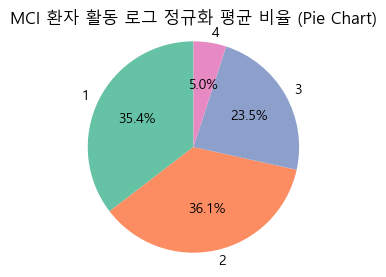

In [3]:
def normalize_activity(log):
    total = sum(log.get(k, 0) for k in ['1', '2', '3', '4'])
    if total == 0:
        return {'1': 0, '2': 0, '3': 0, '4': 0}
    return {k: log.get(k, 0) / total for k in ['1', '2', '3', '4']}

# 2. 정규화된 비율 구하기
normalized_logs = MCI_Fiveminute_log['하루간 5분당 활동 로그 (UTF-8)'].apply(normalize_activity)

# 3. 전체 평균 비율 계산
df_norm = pd.DataFrame(normalized_logs.tolist())
mean_ratios = df_norm.mean()

plt.figure(figsize=(3, 3))
plt.pie(
    mean_ratios.values,
    labels=mean_ratios.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
)
plt.title('MCI 환자 활동 로그 정규화 평균 비율 (Pie Chart)')
plt.axis('equal')  # 동그란 원 유지
plt.show()

**정규화해서 표현을 했다. 그 이유는 다른 CN | Dem 환자의 수는 모두 다르므로, 더 객관적인 평가를 하기 위해서는 normalized해서 표현을 해주어야한다.**

### CN 실험군 - 하루간 5분당 활동 로그

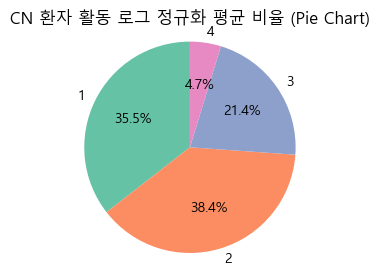

In [4]:
CN_fiveminute_log = Fiveminute_log.loc[Fiveminute_log['진단명']=='CN']
# 2. 정규화된 비율 구하기
normalized_logs = CN_fiveminute_log['하루간 5분당 활동 로그 (UTF-8)'].apply(normalize_activity)

# 3. 전체 평균 비율 계산
df_norm = pd.DataFrame(normalized_logs.tolist())
mean_ratios = df_norm.mean()

plt.figure(figsize=(3, 3))
plt.pie(
    mean_ratios.values,
    labels=mean_ratios.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
)
plt.title('CN 환자 활동 로그 정규화 평균 비율 (Pie Chart)')
plt.axis('equal')  # 동그란 원 유지
plt.show()

### Dem 실험군 - 하루간 5분당 활동 로그

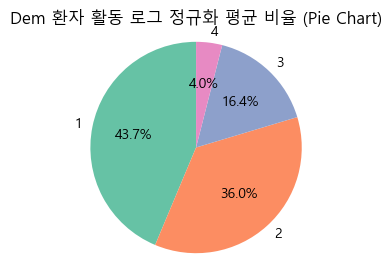

In [5]:
Dem_fiveminute_log = Fiveminute_log.loc[Fiveminute_log['진단명']=='Dem']
# 2. 정규화된 비율 구하기
normalized_logs = Dem_fiveminute_log['하루간 5분당 활동 로그 (UTF-8)'].apply(normalize_activity)

# 3. 전체 평균 비율 계산
df_norm = pd.DataFrame(normalized_logs.tolist())
mean_ratios = df_norm.mean()

plt.figure(figsize=(3, 3))
plt.pie(
    mean_ratios.values,
    labels=mean_ratios.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
)
plt.title('Dem 환자 활동 로그 정규화 평균 비율 (Pie Chart)')
plt.axis('equal')  # 동그란 원 유지
plt.show()

# 하루간 1분당 MET 로그 (UTF-8)
## 구간 별로 나눈다. 0.9 이하 (휴식) | 1.0–1.5 (저강도 활동) | 1.6–3.0 (중강도 활동) | 3.0 초과 (고강도 활동)
- 부분별 구간 분포를 구하고 MCI | CN | DEM 별의 차이점을 확인

In [6]:
minute_log = Analysis1[['하루간 1분당 MET 로그 (UTF-8)','진단명']]

def parse_met(log_str):
    return [float(x) for x in log_str.strip().split('/') if x]

# (2) MET 구간 분류 함수
def met_distribution(met_list):
    total = len(met_list)
    if total == 0:
        return {'휴식': 0, '저강도': 0, '중강도': 0, '고강도': 0}
    return {
        '휴식': sum(m <= 0.9 for m in met_list) / total,
        '저강도': sum(1.0 <= m <= 1.5 for m in met_list) / total,
        '중강도': sum(1.6 <= m <= 3.0 for m in met_list) / total,
        '고강도': sum(m > 3.0 for m in met_list) / total
    }

df = minute_log.copy()
df['parsed_MET'] = df['하루간 1분당 MET 로그 (UTF-8)'].apply(parse_met)
df_dist = df['parsed_MET'].apply(met_distribution).apply(pd.Series)

# (4) 진단명 컬럼 추가
df_dist['진단명'] = df['진단명']

# (5) 진단별 평균 분포 확인
grouped = df_dist.groupby('진단명').mean()
print(grouped)

           휴식       저강도       중강도       고강도
진단명                                        
CN   0.355683  0.397148  0.190138  0.057031
Dem  0.434568  0.371338  0.143920  0.050174
MCI  0.359512  0.372669  0.210092  0.057728


In [23]:
import joblib
joblib.load('Selected_DF.pkl')

,하루간 평균 MET,하루간 활동 칼로리,하루간 총 사용 칼로리,비활동 시간,비활동 알람 횟수,저강도 활동 시간,하루간 비활동 MET,하루간 저강도 활동 MET,활동 점수,활동 목표달성 점수,회복시간 점수,활동 유지 점수,운동량 점수,매일 걸음 수,활동 총 시간(분),진단명
0,1.28125,196,2251,714,0,201,8,133,87,78,100,54,97,4212,207,MCI
1,1.25000,145,2159,719,0,131,9,82,83,60,100,58,96,3306,140,MCI
2,1.21875,118,2140,708,1,125,12,66,73,43,100,55,83,2550,131,MCI
3,1.28125,180,2240,705,0,203,10,122,70,43,100,58,59,4009,208,MCI
4,1.46875,374,2559,437,0,511,18,268,70,43,100,89,46,8081,517,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,1.34375,249,2351,780,4,167,10,106,61,25,100,45,95,4972,190,CN
9701,1.53125,570,2682,518,1,332,7,257,78,43,100,76,93,11878,394,CN
9702,1.34375,295,2331,578,0,173,8,99,70,25,100,70,95,5752,207,CN
9703,1.31250,186,2280,778,1,138,11,86,66,25,100,47,93,3852,156,CN


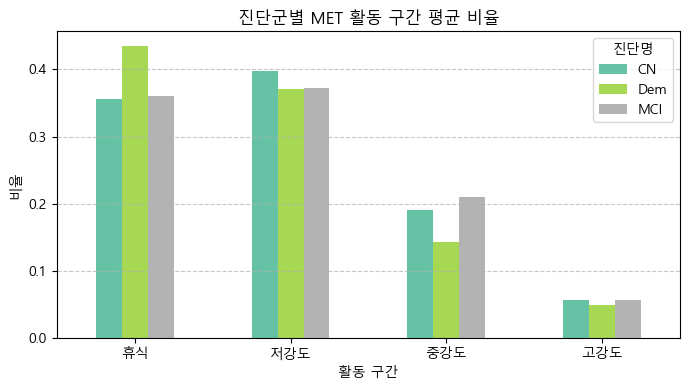

In [7]:
# 바그래프 (진단명별 평균 활동 비율)
grouped.T.plot(kind='bar', figsize=(7, 4), colormap='Set2')
plt.title('진단군별 MET 활동 구간 평균 비율')
plt.xlabel('활동 구간')
plt.ylabel('비율')
plt.xticks(rotation=0)
plt.legend(title='진단명')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [22]:
import numpy as np
def t_scaler(col):
    sampling_mean = col.mean()
    sampling_std = col.std()
    sampling_size = len(col)
    print(sampling_mean, sampling_std, sampling_size)
    return (col - sampling_mean) / (sampling_std / np.sqrt(sampling_size))
    
data = {'key': np.random.randint(100,size=100)}
data = pd.DataFrame(data)
t_scaler(data['key'])

52.86 28.405796819122905 100


0    -11.568061
1     -9.455816
2    -13.680306
3      9.554388
4     -1.006837
        ...    
95    -2.767041
96    -4.527245
97    -2.767041
98    10.962551
99    13.074796
Name: key, Length: 100, dtype: float64

In [8]:
def t_scaler(col):
    sampling_mean = col.mean()
    sampling_var =  col.var()
    sampling_size = len(col)
    return (col.values - sampling_mean) / (sampling_var**(1/2) / sampling_size**(1/2))

# 결론

1. **치매를 겪고 계신 환자분들이 더욱 정적인 상태에 있다는 것을 의미한다.**
2. **치매를 겪고 계신 환자분들은 그렇지 아니한 분들보다 (걷기, 외출, 반복 움직임)에 대한 활동이 저조하다.**
3. **1분 MET 로그 또한 Dem 환자의 휴식 시간이 더 많음을 시사한다.**

# 분석 현황

- 하루간 평균 MET
- 하루간 활동 칼로리
- 하루간 총 사용 칼로리
- 매일 움직인 거리(m)
- 활동 종료 시간
- 활동 시작 시간
- 고강도 활동 시간
- 비활동 시간
- 비활동 알람 횟수
- 저강도 활동 시간
- 중강도 활동 시간
- 하루간 고강도 활동 MET
- 하루간 비활동 MET
- 하루간 저강도 활동 MET
- 하루간 중강도 활동 MET
- 반지 미착용 시간
- 휴식 시간
- 활동 점수
- 활동 목표달성 점수
- 매 시간 당 활동유지 점수
- 회복시간 점수
- 활동 유지 점수
- 운동 빈도 점수
- 운동량 점수
- 매일 걸음 수
- 활동 총 시간(분)
- 하루간 5분당 활동 로그 (UTF-8) -> 분석 완료
- 하루간 1분당 MET 로그 (UTF-8) -> 분석 완료